In [570]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
import math
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [238]:
df_prouni = pd.read_csv('pda-prouni-2016.csv', low_memory=False, sep=';', encoding = "ISO-8859-1")

In [239]:
df_prouni

,ANO_CONCESSAO_BOLSA,CODIGO_EMEC_IES_BOLSA,NOME_IES_BOLSA,TIPO_BOLSA,MODALIDADE_ENSINO_BOLSA,NOME_CURSO_BOLSA,NOME_TURNO_CURSO_BOLSA,CPF_BENEFICIARIO_BOLSA,SEXO_BENEFICIARIO_BOLSA,RACA_BENEFICIARIO_BOLSA,DT_NASCIMENTO_BENEFICIARIO,BENEFICIARIO_DEFICIENTE_FISICO,REGIAO_BENEFICIARIO_BOLSA,SIGLA_UF_BENEFICIARIO_BOLSA,MUNICIPIO_BENEFICIARIO_BOLSA
0,2016,20,UNIVERSIDADE DE PASSO FUNDO,BOLSA PARCIAL 50%,PRESENCIAL,Administração,Noturno,***847010**,Feminino,Branca,06-12-1995,NÃO,SUL,RS,SOLEDADE
1,2016,20,UNIVERSIDADE DE PASSO FUNDO,BOLSA INTEGRAL,PRESENCIAL,Administração,Noturno,***377850**,Feminino,Branca,08-08-1990,NÃO,SUL,RS,SOLEDADE
2,2016,20,UNIVERSIDADE DE PASSO FUNDO,BOLSA PARCIAL 50%,PRESENCIAL,Administração,Noturno,***266150**,Masculino,Branca,08-03-1999,NÃO,SUL,RS,SOLEDADE
3,2016,20,UNIVERSIDADE DE PASSO FUNDO,BOLSA PARCIAL 50%,PRESENCIAL,Administração,Noturno,***408700**,Feminino,Branca,24-04-1997,NÃO,SUL,RS,SOLEDADE
4,2016,423,UNIVERSIDADE REGIONAL INTEGRADA DO ALTO URUGUA...,BOLSA PARCIAL 50%,PRESENCIAL,Ciências Contábeis,Noturno,***560300**,Masculino,Branca,07-05-1994,NÃO,SUL,RS,ERECHIM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239257,2016,1472,CENTRO UNIVERSITÁRIO LEONARDO DA VINCI,BOLSA INTEGRAL,EDUCAÇÃO A DISTÂNCIA,Pedagogia,Curso a distância,***100559**,Feminino,Preta,01-05-1982,NÃO,SUL,SC,BALNEÁRIO RINCÃO
239258,2016,1472,CENTRO UNIVERSITÁRIO LEONARDO DA VINCI,BOLSA INTEGRAL,EDUCAÇÃO A DISTÂNCIA,Processos Gerenciais,Curso a distância,***830879**,Feminino,Branca,02-10-1985,NÃO,SUL,SC,PESCARIA BRAVA
239259,2016,1472,CENTRO UNIVERSITÁRIO LEONARDO DA VINCI,BOLSA INTEGRAL,EDUCAÇÃO A DISTÂNCIA,Processos Gerenciais,Curso a distância,***695039**,Feminino,Branca,19-09-1997,NÃO,SUL,SC,PESCARIA BRAVA
239260,2016,1491,CENTRO UNIVERSITÁRIO INTERNACIONAL,BOLSA INTEGRAL,EDUCAÇÃO A DISTÂNCIA,Matemática,Curso a distância,***810222**,Masculino,Parda,04-04-1997,NÃO,NORTE,PA,MOJUÍ DOS CAMPOS


In [377]:
df_prouni['RACA_BENEFICIARIO_BOLSA'].value_counts()

Parda            107354
Branca            97298
Preta             30003
Amarela            4403
Indígena            194
Não Informada        10
Name: RACA_BENEFICIARIO_BOLSA, dtype: int64

In [378]:
df_prouni['SEXO_BENEFICIARIO_BOLSA'].value_counts()

Feminino     131205
Masculino    108057
Name: SEXO_BENEFICIARIO_BOLSA, dtype: int64

In [380]:
df_prouni['MODALIDADE_ENSINO_BOLSA'].value_counts()

PRESENCIAL              191397
EDUCAÇÃO A DISTÂNCIA     47865
Name: MODALIDADE_ENSINO_BOLSA, dtype: int64

In [381]:
df_prouni['TIPO_BOLSA'].value_counts()

BOLSA INTEGRAL       157406
BOLSA PARCIAL 50%     81856
Name: TIPO_BOLSA, dtype: int64

In [382]:
df_prouni['NOME_TURNO_CURSO_BOLSA'].value_counts()

Noturno              128714
Matutino              49368
Curso a distância     47865
Integral               6741
Vespertino             6574
Name: NOME_TURNO_CURSO_BOLSA, dtype: int64

In [383]:
df_prouni['NOME_CURSO_BOLSA'].value_counts()

Administração                              24567
Direito                                    18731
Pedagogia                                  16416
Ciências Contábeis                         12994
Engenharia Civil                           10658
                                           ...  
Bioenergia                                     1
Engenharia De Produção E Qualidade             1
Desenvolvimento De Software                    1
Análise De Sistemas                            1
Comunicação Social - Produção Editorial        1
Name: NOME_CURSO_BOLSA, Length: 298, dtype: int64

# Calcular idade, dado data de nascimento

In [240]:
from datetime import datetime
datetime.now()
dif_dias = datetime.now() - pd.to_datetime(df_prouni.DT_NASCIMENTO_BENEFICIARIO)
idade = np.array((dif_dias.dt.days/365).values, dtype='int')
idade

array([24, 29, 20, ..., 22, 22, 22])

# Trocar coluna "Data de Nascimento" por "Idade"

In [292]:
df_prouni['DT_NASCIMENTO_BENEFICIARIO'] = idade
df_prouni.rename (columns={'DT_NASCIMENTO_BENEFICIARIO': 'IDADE_BENEFICIARIO'}, inplace=True)
df_prouni

,ANO_CONCESSAO_BOLSA,CODIGO_EMEC_IES_BOLSA,NOME_IES_BOLSA,TIPO_BOLSA,MODALIDADE_ENSINO_BOLSA,NOME_CURSO_BOLSA,NOME_TURNO_CURSO_BOLSA,CPF_BENEFICIARIO_BOLSA,SEXO_BENEFICIARIO_BOLSA,RACA_BENEFICIARIO_BOLSA,IDADE_BENEFICIARIO,BENEFICIARIO_DEFICIENTE_FISICO,REGIAO_BENEFICIARIO_BOLSA,SIGLA_UF_BENEFICIARIO_BOLSA,MUNICIPIO_BENEFICIARIO_BOLSA,IDADE_BENEFICIARIO
0,2016,20,UNIVERSIDADE DE PASSO FUNDO,BOLSA PARCIAL 50%,PRESENCIAL,Administração,Noturno,***847010**,Feminino,Branca,24,NÃO,SUL,RS,SOLEDADE,24
1,2016,20,UNIVERSIDADE DE PASSO FUNDO,BOLSA INTEGRAL,PRESENCIAL,Administração,Noturno,***377850**,Feminino,Branca,29,NÃO,SUL,RS,SOLEDADE,29
2,2016,20,UNIVERSIDADE DE PASSO FUNDO,BOLSA PARCIAL 50%,PRESENCIAL,Administração,Noturno,***266150**,Masculino,Branca,20,NÃO,SUL,RS,SOLEDADE,20
3,2016,20,UNIVERSIDADE DE PASSO FUNDO,BOLSA PARCIAL 50%,PRESENCIAL,Administração,Noturno,***408700**,Feminino,Branca,22,NÃO,SUL,RS,SOLEDADE,22
4,2016,423,UNIVERSIDADE REGIONAL INTEGRADA DO ALTO URUGUA...,BOLSA PARCIAL 50%,PRESENCIAL,Ciências Contábeis,Noturno,***560300**,Masculino,Branca,25,NÃO,SUL,RS,ERECHIM,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239257,2016,1472,CENTRO UNIVERSITÁRIO LEONARDO DA VINCI,BOLSA INTEGRAL,EDUCAÇÃO A DISTÂNCIA,Pedagogia,Curso a distância,***100559**,Feminino,Preta,37,NÃO,SUL,SC,BALNEÁRIO RINCÃO,37
239258,2016,1472,CENTRO UNIVERSITÁRIO LEONARDO DA VINCI,BOLSA INTEGRAL,EDUCAÇÃO A DISTÂNCIA,Processos Gerenciais,Curso a distância,***830879**,Feminino,Branca,34,NÃO,SUL,SC,PESCARIA BRAVA,34
239259,2016,1472,CENTRO UNIVERSITÁRIO LEONARDO DA VINCI,BOLSA INTEGRAL,EDUCAÇÃO A DISTÂNCIA,Processos Gerenciais,Curso a distância,***695039**,Feminino,Branca,22,NÃO,SUL,SC,PESCARIA BRAVA,22
239260,2016,1491,CENTRO UNIVERSITÁRIO INTERNACIONAL,BOLSA INTEGRAL,EDUCAÇÃO A DISTÂNCIA,Matemática,Curso a distância,***810222**,Masculino,Parda,22,NÃO,NORTE,PA,MOJUÍ DOS CAMPOS,22


# Média de Idade

In [242]:
df_prouni['IDADE_BENEFICIARIO'].mean()

26.67639240665045

# Média de idade por UF

In [243]:
liststates = np.sort(df_prouni.SIGLA_UF_BENEFICIARIO_BOLSA.unique())
means = list(df_prouni.groupby(['SIGLA_UF_BENEFICIARIO_BOLSA'])['IDADE_BENEFICIARIO'].mean())
df_idade_UF = pd.DataFrame(means,liststates)
df_idade_UF.reset_index(inplace=True)
df_idade_UF.rename (columns={0: 'media_idade', 'index':'UF'}, inplace=True)
df_idade_UF

,UF,media_idade
0,AC,26.776360
1,AL,27.902767
2,AM,27.660556
3,AP,28.049889
4,BA,27.534250
5,CE,26.103003
6,DF,26.332379
7,ES,27.019868
8,GO,26.290212
9,MA,26.618029


In [244]:
norte = ['AM', 'RR', 'AP', 'PA', 'TO', 'RO', 'AC']
nordeste = ['MA', 'PI', 'CE', 'RN', 'PE', 'PB', 'SE', 'AL', 'BA']
centro_oeste = ['MT','MS','GO','DF']
sudeste = ['SP', 'RJ', 'ES', 'MG']
sul = ['PR','RS','SC']
regioes = ['norte','centro_oeste','nordeste','sudeste','sul']

In [245]:
df_idade_UF['regiao'] = np.zeros(27)
df_idade_UF.loc[df_idade_UF['UF'].isin(norte), ['regiao']] = 'norte'
df_idade_UF.loc[df_idade_UF['UF'].isin(nordeste), ['regiao']] = 'nordeste'
df_idade_UF.loc[df_idade_UF['UF'].isin(sul), ['regiao']] = 'sul'
df_idade_UF.loc[df_idade_UF['UF'].isin(sudeste), ['regiao']] = 'sudeste'
df_idade_UF.loc[df_idade_UF['UF'].isin(centro_oeste), ['regiao']] = 'centro_oeste'
df_idade_UF


,UF,media_idade,regiao
0,AC,26.776360,norte
1,AL,27.902767,nordeste
2,AM,27.660556,norte
3,AP,28.049889,norte
4,BA,27.534250,nordeste
5,CE,26.103003,nordeste
6,DF,26.332379,centro_oeste
7,ES,27.019868,sudeste
8,GO,26.290212,centro_oeste
9,MA,26.618029,nordeste


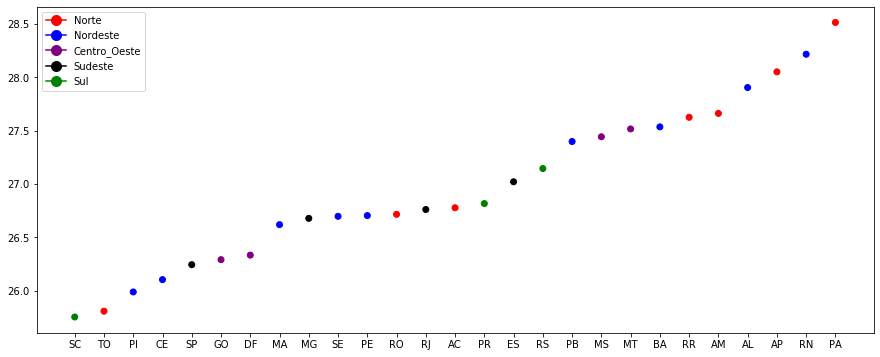

In [246]:
df_idade_UF_sorted = df_idade_UF.sort_values(by=['media_idade'])

colors = {'norte':'red', 'nordeste':'blue', 'sul':'green', 'sudeste':'black', 'centro_oeste':'purple'}

fig, ax = plt.subplots(figsize=(15,6))
ax.scatter(df_idade_UF_sorted['UF'], df_idade_UF_sorted['media_idade'], c=df_idade_UF_sorted['regiao'].apply(lambda x: colors[x]))

from matplotlib.patches import Patch
from matplotlib.lines import Line2D

legend_elements = [Line2D([0], [0], marker='o', color='red', label='Norte',
                          markerfacecolor='red', markersize=10),
                   Line2D([0], [0], marker='o', color='blue', label='Nordeste',
                          markerfacecolor='blue', markersize=10),
                   Line2D([0], [0], marker='o', color='purple', label='Centro_Oeste',
                          markerfacecolor='purple', markersize=10),
                  Line2D([0], [0], marker='o', color='black', label='Sudeste',
                          markerfacecolor='black', markersize=10),
                  Line2D([0], [0], marker='o', color='green', label='Sul',
                          markerfacecolor='green', markersize=10)]

ax.legend(handles=legend_elements, loc=0)

plt.show()

# Média de idade por regiões

In [247]:
df_idade_regiao = df_idade_UF.groupby(['regiao'])['media_idade'].mean().reset_index().sort_values('media_idade')
df_idade_regiao

,regiao,media_idade
4,sul,26.570795
3,sudeste,26.674982
0,centro_oeste,26.894797
1,nordeste,27.017455
2,norte,27.306561


<BarContainer object of 5 artists>

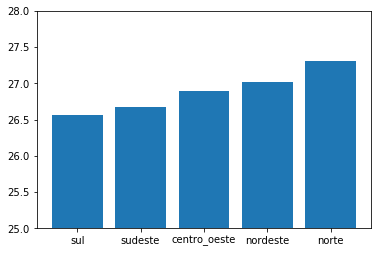

In [248]:
plt.ylim(25,28)
plt.bar(df_idade_regiao['regiao'], df_idade_regiao['media_idade'])

# Idade Média por Raça

In [273]:
liststates = np.sort(df_prouni.RACA_BENEFICIARIO_BOLSA.unique())
means = list(df_prouni.groupby(['RACA_BENEFICIARIO_BOLSA'])['IDADE_BENEFICIARIO'].mean())
df_idade_raça = pd.DataFrame(means,liststates)
df_idade_raça.reset_index(inplace=True)
df_idade_raça.rename (columns={0: 'media_idade', 'index':'raça'}, inplace=True)
df_idade_raça.sort_values('media_idade', inplace=True)

<BarContainer object of 6 artists>

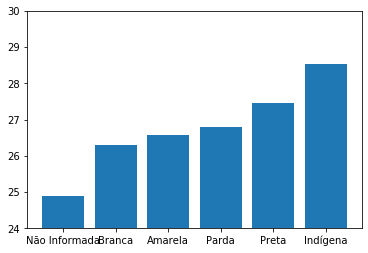

In [275]:
plt.ylim(24,30)
plt.bar(df_idade_raça['raça'], df_idade_raça['media_idade'])

# Idade Média por Gênero

In [276]:
liststates = np.sort(df_prouni.SEXO_BENEFICIARIO_BOLSA.unique())
means = list(df_prouni.groupby(['SEXO_BENEFICIARIO_BOLSA'])['IDADE_BENEFICIARIO'].mean())
df_idade_genero = pd.DataFrame(means,liststates)
df_idade_genero.reset_index(inplace=True)
df_idade_genero.rename (columns={0: 'media_idade', 'index':'genero'}, inplace=True)
df_idade_genero.sort_values('media_idade')

,genero,media_idade
0,Feminino,26.311017
1,Masculino,27.120038


<BarContainer object of 2 artists>

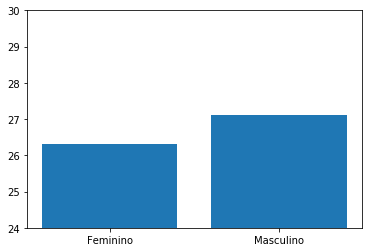

In [277]:
plt.ylim(24,30)
plt.bar(df_idade_genero['genero'], df_idade_genero['media_idade'])

In [279]:
liststates = np.sort(df_prouni.SEXO_BENEFICIARIO_BOLSA.unique())
means = df_prouni.groupby(['SEXO_BENEFICIARIO_BOLSA','RACA_BENEFICIARIO_BOLSA'])['IDADE_BENEFICIARIO'].mean()
df_idade_genero_raca = means.reset_index().sort_values('IDADE_BENEFICIARIO')
df_idade_genero_raca

,SEXO_BENEFICIARIO_BOLSA,RACA_BENEFICIARIO_BOLSA,IDADE_BENEFICIARIO
9,Masculino,Não Informada,20.750000
1,Feminino,Branca,25.999378
0,Feminino,Amarela,26.257875
4,Feminino,Parda,26.369152
7,Masculino,Branca,26.688505
6,Masculino,Amarela,27.126718
5,Feminino,Preta,27.189141
10,Masculino,Parda,27.313524
3,Feminino,Não Informada,27.666667
11,Masculino,Preta,27.720243


# Idade Média por Gênero/Raça

<BarContainer object of 12 artists>

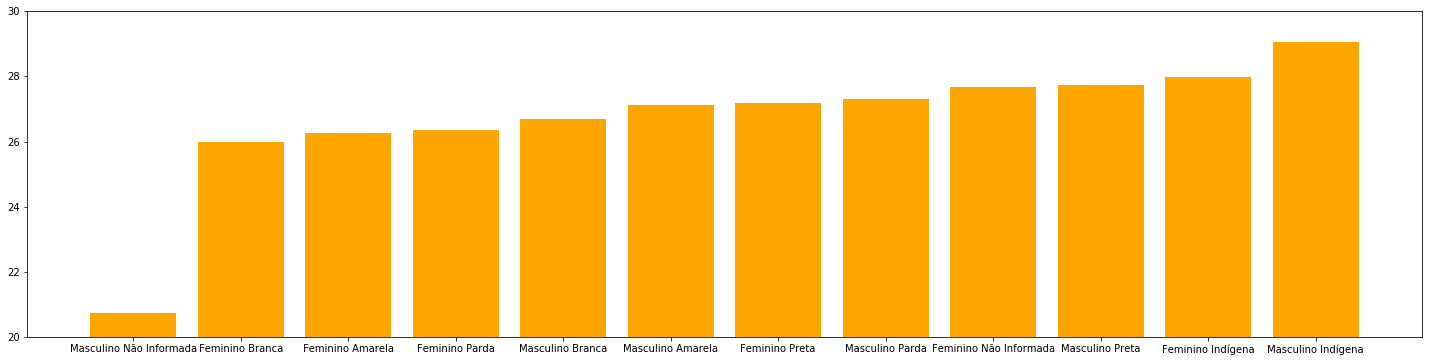

In [326]:
df_idade_genero_raca["carac"] = df_idade_genero_raca['SEXO_BENEFICIARIO_BOLSA'].map(str) + " " +df_idade_genero_raca['RACA_BENEFICIARIO_BOLSA']
plt.figure(figsize=(25,6))
plt.ylim(20,30)
plt.bar(df_idade_genero_raca['carac'], df_idade_genero_raca['IDADE_BENEFICIARIO'], color='orange')

# Share de turnos

In [363]:
df_turno = pd.DataFrame(df_prouni.groupby(['MODALIDADE_ENSINO_BOLSA', 'SEXO_BENEFICIARIO_BOLSA', 'RACA_BENEFICIARIO_BOLSA'])['RACA_BENEFICIARIO_BOLSA'].count())
df_turno.rename (columns={'RACA_BENEFICIARIO_BOLSA': 'count'}, inplace=True)
df_turno.reset_index()

,MODALIDADE_ENSINO_BOLSA,SEXO_BENEFICIARIO_BOLSA,RACA_BENEFICIARIO_BOLSA,count
0,EDUCAÇÃO A DISTÂNCIA,Feminino,Amarela,530
1,EDUCAÇÃO A DISTÂNCIA,Feminino,Branca,11319
2,EDUCAÇÃO A DISTÂNCIA,Feminino,Indígena,23
3,EDUCAÇÃO A DISTÂNCIA,Feminino,Não Informada,1
4,EDUCAÇÃO A DISTÂNCIA,Feminino,Parda,12288
5,EDUCAÇÃO A DISTÂNCIA,Feminino,Preta,3694
6,EDUCAÇÃO A DISTÂNCIA,Masculino,Amarela,314
7,EDUCAÇÃO A DISTÂNCIA,Masculino,Branca,7228
8,EDUCAÇÃO A DISTÂNCIA,Masculino,Indígena,30
9,EDUCAÇÃO A DISTÂNCIA,Masculino,Parda,9432


# Tipos de Bolsa

In [365]:
df_bolsa = pd.DataFrame(df_prouni.groupby(['TIPO_BOLSA', 'SEXO_BENEFICIARIO_BOLSA', 'RACA_BENEFICIARIO_BOLSA'])['TIPO_BOLSA'].count())
df_bolsa.rename (columns={'TIPO_BOLSA': 'count'}, inplace=True)
df_bolsa.reset_index()

,TIPO_BOLSA,SEXO_BENEFICIARIO_BOLSA,RACA_BENEFICIARIO_BOLSA,count
0,BOLSA INTEGRAL,Feminino,Amarela,1484
1,BOLSA INTEGRAL,Feminino,Branca,36926
2,BOLSA INTEGRAL,Feminino,Indígena,67
3,BOLSA INTEGRAL,Feminino,Não Informada,6
4,BOLSA INTEGRAL,Feminino,Parda,37065
5,BOLSA INTEGRAL,Feminino,Preta,10016
6,BOLSA INTEGRAL,Masculino,Amarela,970
7,BOLSA INTEGRAL,Masculino,Branca,29032
8,BOLSA INTEGRAL,Masculino,Indígena,69
9,BOLSA INTEGRAL,Masculino,Não Informada,4


In [386]:
pd.DataFrame(newdf)

TIPO_BOLSA
TIPO_BOLSA        SEXO_BENEFICIARIO_BOLSA RACA_BENEFICIARIO_BOLSA            
BOLSA INTEGRAL    Feminino                Amarela                        1484
                                          Branca                        36926
                                          Indígena                         67
                                          Não Informada                     6
                                          Parda                         37065
                                          Preta                         10016
                  Masculino               Amarela                         970
                                          Branca                        29032
                                          Indígena                         69
                                          Não Informada                     4
                                          Parda                         32322
                                          Preta                          9445
BOLSA PARCIAL 50% Feminino                Amarela                        1246
                                          Branca                        17771
                                          Indígena                         25
                                          Parda                         21071
                                          Preta                          5528
                  Masculino               Amarela                         703
                                          Branca                        13569
                                          Indígena                         33
                                          Parda                         16896
                                          Preta                          5014

# CLASSIFICAÇÃO

# PREVER TIPO DE BOLSA BASEADO EM RAÇA, SEXO, MODALIDADE, UF, NOME


In [633]:
x = df_prouni[['MODALIDADE_ENSINO_BOLSA', "SEXO_BENEFICIARIO_BOLSA", 'SIGLA_UF_BENEFICIARIO_BOLSA','NOME_CURSO_BOLSA']]
y = df_prouni[['TIPO_BOLSA']]

In [634]:
x

,MODALIDADE_ENSINO_BOLSA,SEXO_BENEFICIARIO_BOLSA,SIGLA_UF_BENEFICIARIO_BOLSA,NOME_CURSO_BOLSA
0,PRESENCIAL,Feminino,RS,Administração
1,PRESENCIAL,Feminino,RS,Administração
2,PRESENCIAL,Masculino,RS,Administração
3,PRESENCIAL,Feminino,RS,Administração
4,PRESENCIAL,Masculino,RS,Ciências Contábeis
...,...,...,...,...
239257,EDUCAÇÃO A DISTÂNCIA,Feminino,SC,Pedagogia
239258,EDUCAÇÃO A DISTÂNCIA,Feminino,SC,Processos Gerenciais
239259,EDUCAÇÃO A DISTÂNCIA,Feminino,SC,Processos Gerenciais
239260,EDUCAÇÃO A DISTÂNCIA,Masculino,PA,Matemática


In [635]:
for column in ["SEXO_BENEFICIARIO_BOLSA", "MODALIDADE_ENSINO_BOLSA", "SIGLA_UF_BENEFICIARIO_BOLSA", "NOME_CURSO_BOLSA"]:
    x[column] = x[column].astype('category')
    x[column] = x[column].cat.codes


C:\Users\Pedro\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Pedro\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [636]:
x

,MODALIDADE_ENSINO_BOLSA,SEXO_BENEFICIARIO_BOLSA,SIGLA_UF_BENEFICIARIO_BOLSA,NOME_CURSO_BOLSA
0,1,0,22,0
1,1,0,22,0
2,1,1,22,0
3,1,0,22,0
4,1,1,22,40
...,...,...,...,...
239257,0,0,23,237
239258,0,0,23,243
239259,0,0,23,243
239260,0,1,13,213


In [637]:
def calcula_meu_acerto(predicted, y_test):
    erro = 0
    for y_chapeu, y_real in zip(predicted, y_test):
        if y_chapeu != y_real:
            erro += 1
    return 1 - (erro/len(predicted))

In [638]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)


In [639]:
m = RandomForestClassifier(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
m.feature_importances_


C:\Users\Pedro\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


array([0.13926536, 0.01089984, 0.45063109, 0.39920371])

In [640]:
X_train.columns

Index(['MODALIDADE_ENSINO_BOLSA', 'SEXO_BENEFICIARIO_BOLSA',
       'SIGLA_UF_BENEFICIARIO_BOLSA', 'NOME_CURSO_BOLSA'],
      dtype='object')

In [641]:
predictedforest = m.predict(X_test)

In [642]:
calcula_meu_acerto(predictedforest,y_test.values)

0.7283964689641197

In [643]:
n_neighbors = 15
model = KNeighborsClassifier(n_neighbors=10, weights='distance')
model.fit(X_train, y_train)
predictedknn= model.predict(X_test)

C:\Users\Pedro\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [644]:
calcula_meu_acerto(predictedknn,y_test.values)

0.7155920311055385

# Só os que fazem administração

In [645]:
df_prouni_admin = df_prouni[df_prouni.NOME_CURSO_BOLSA == "Administração"]

In [646]:
x = df_prouni_admin[['RACA_BENEFICIARIO_BOLSA', 'SEXO_BENEFICIARIO_BOLSA', 'MODALIDADE_ENSINO_BOLSA', 'SIGLA_UF_BENEFICIARIO_BOLSA']]
y = df_prouni_admin[['TIPO_BOLSA']]

In [647]:
for column in ["RACA_BENEFICIARIO_BOLSA", "SEXO_BENEFICIARIO_BOLSA", "MODALIDADE_ENSINO_BOLSA", "SIGLA_UF_BENEFICIARIO_BOLSA"]:
    x[column] = x[column].astype('category')
    x[column] = x[column].cat.codes


C:\Users\Pedro\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Pedro\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [648]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [649]:
m = RandomForestClassifier(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
m.feature_importances_

C:\Users\Pedro\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


array([0.03634311, 0.02861118, 0.3229557 , 0.61209001])

In [650]:
predictedforest = m.predict(X_test)

In [654]:
X_train.columns

Index(['RACA_BENEFICIARIO_BOLSA', 'SEXO_BENEFICIARIO_BOLSA',
       'MODALIDADE_ENSINO_BOLSA', 'SIGLA_UF_BENEFICIARIO_BOLSA'],
      dtype='object')

In [651]:
calcula_meu_acerto(predictedforest, y_test.values)

0.7041193882585102

In [652]:
model = KNeighborsClassifier(n_neighbors=10, weights='distance')
model.fit(X_train, y_train)
predictedknn= model.predict(X_test)

C:\Users\Pedro\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


In [653]:
calcula_meu_acerto(predictedknn,y_test.values)

0.6845091267883572